In [1]:
from cgi import print_environ
from time import time
import pandas as pd
from sklearn import datasets
from Preprocessor1 import Preprocessor
from sklearn.preprocessing import LabelEncoder
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import fasttext

from Vectorizing.CountVectorizer import getCountVectorizer
from Vectorizing.TF_IDF_Vectorizer import getWordLevelVectorizer, getNGramLevelVectorizer
from Embedding.WordEmbedding import createWordEmbedding
from Report import Report
from writeResults import writeResults
from Report.CrossValidateNN import cross_validate_NN
from lstmModel import create_lstm_model, create_bidirec_lstm_model

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support, make_scorer, accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

2022-03-14 23:23:59.235196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-14 23:23:59.235213: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
TEXT = "Text"
LABEL = "Label"

In [3]:
df_train = pd.read_csv('../data/readme_train.csv', sep=';')
df_test = pd.read_csv('../data/readme_test.csv', sep=';')
df_train = df_train.drop(df_train[df_train['Label'] == 'General'].index)
#df_train = df_train.drop(df_train[df_train['Label'] == 'Other'].index)
df_test = df_test.drop(df_test[df_test['Label'] == 'General'].index)
#df_test = df_test.drop(df_test[df_test['Label'] == 'Other'].index)

print(df_test['Label'].unique())

Preprocessor(df_train).run()
Preprocessor(df_test).run()

#clf = OneVsRestClassifier(SVC()).fit(X, y)

['Reinforcement Learning' 'Computer Vision' 'Graphs'
 'Natural Language Processing' 'Audio' 'Sequential']
Final: 
              Label                                             Repo  \
1  Computer Vision              https://github.com/KPMG-wiseuniv/AI   
4  Computer Vision              https://github.com/bupt-ai-cz/LLVIP   
5  Computer Vision  https://github.com/kfx7577/Caffe_VehicleCounter   
6  Computer Vision                   https://github.com/MCG-NJU/TDN   
7  Computer Vision           https://github.com/achiyaj/vqa-sandbox   

                                                Text  
1  fit room 슬기로운 대학생활 안녕하십니까 저희는 covid19 이후 ‘인테리어...  
4  llvip visibleinfrar pair dataset lowlight visi...  
5  ssd singl shot multibox detector build wei dra...  
6  tdn tempor differ effici action recognit cvpr ...  
7  tffasterrcnn deprec good uptod fastermask rcnn...  
Final: 
                     Label                                               Repo  \
0  Reinforcement Learning  https://gith

In [4]:
print(df_train['Label'].unique())

['Computer Vision' 'Natural Language Processing' 'Sequential'
 'Reinforcement Learning' 'Audio' 'Graphs' 'Other']


In [5]:
x_train = df_train[TEXT]
y_train = df_train[LABEL]
x_test = df_test[TEXT]
y_test = df_test[LABEL]

In [6]:
# CountVecotirzing
count_vect = getCountVectorizer(df_train, TEXT)
xtrain_count = count_vect.transform(x_train)
xtest_count = count_vect.transform(x_test)
#if test is undersampled:
#xtest_count = count_vect.transform(x_test[TEXT])

count vectorizer done


AttributeError: 'CountVectorizer' object has no attribute 'feature_names'

In [7]:
clf = OneVsRestClassifier(SVC()).fit(xtrain_count, y_train)

In [8]:
y_pred = clf.predict(xtest_count)

In [9]:
clf.predict(count_vect.transform(['vision detects convolution vision 3d 3d 3d image image image detection image image']))

array(['Other'], dtype='<U27')

In [10]:
y_unique = y_test.unique()
cm = confusion_matrix(y_test, y_pred, labels=y_unique)
cm_df = pd.DataFrame(cm, index = [y_unique], columns = [y_unique])
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
m = precision_recall_fscore_support(y_test, y_pred, average='weighted')
precision = m[0]
recall = m[1]
f1score = m[2]
print(f"Precision: {m[0]} \nRecall: {m[1]} \nF1-score: {m[2]}")

Accuracy: 0.7876106194690266
Precision: 0.871226157093086 
Recall: 0.7876106194690266 
F1-score: 0.8180489306616471


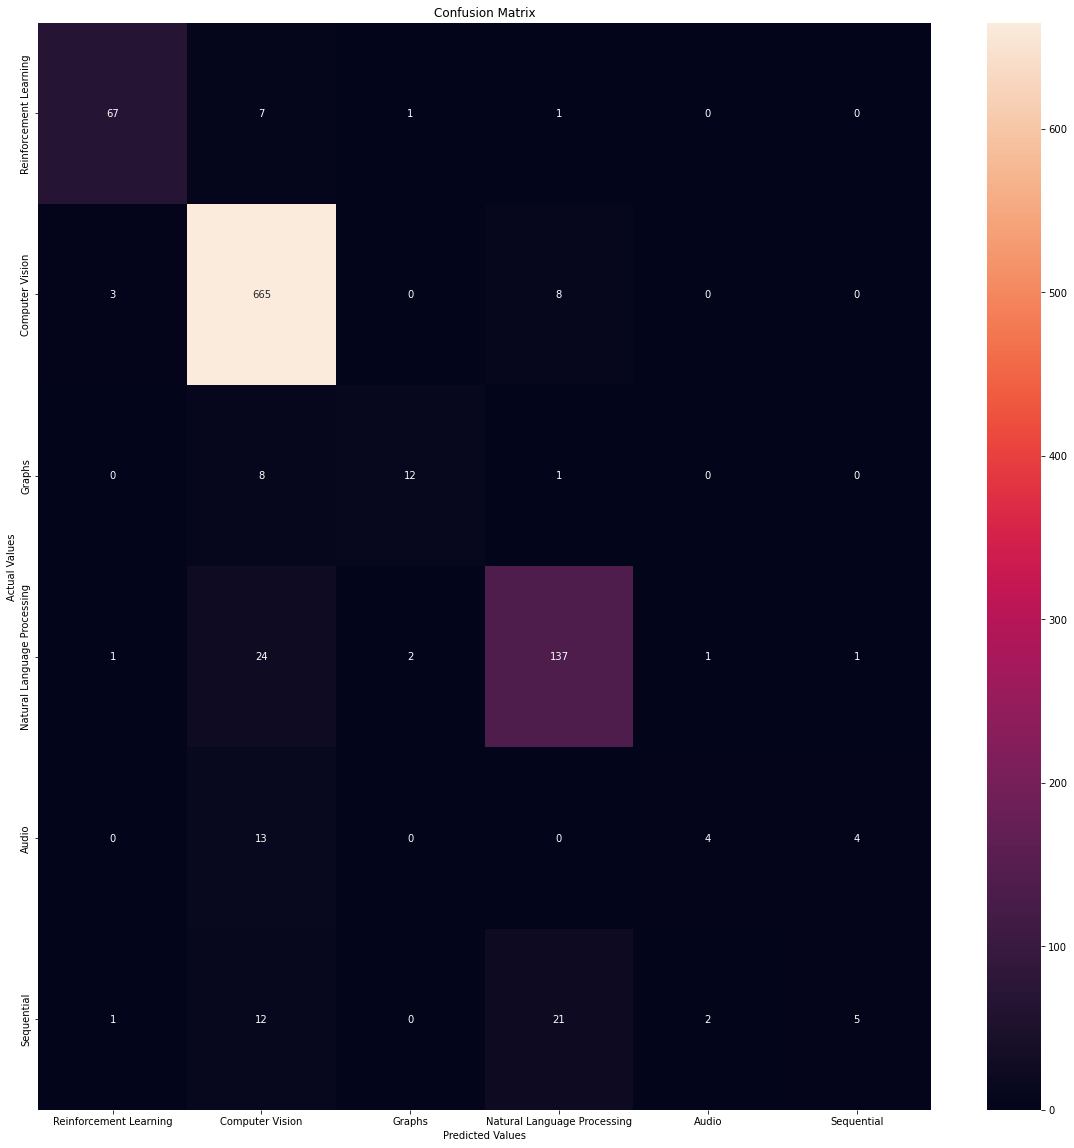

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()